# Basic simulation template

This is a basic Tidy3D script showing the FDTD simulation of a delectric cube in the presence of a point dipole.

In [1]:
# import package and authenticate (if needed)
import tidy3d as td
import tidy3d.web as web
# web.configure("YOUR API KEY GOES HERE")

In [2]:
# set up parameters of simulation (length scales are micrometers)
freq0 = td.C_0 / 0.75

In [3]:
# create structure
square = td.Structure(
    geometry=td.Box(center=(0, 0, 0), size=(1.5, 1.5, 1.5)), 
    medium=td.Medium(permittivity=2.0)
)

In [4]:
# create source
source = td.UniformCurrentSource(
    center=(-1.5, 0, 0),
    size=(0, 0.4, 0.4),
    source_time=td.GaussianPulse(freq0=freq0, fwidth=freq0 / 10.0),
    polarization="Ey",
)

In [5]:
# create monitor
monitor = td.FieldMonitor(
    size=(td.inf, td.inf, 0),
    freqs=[freq0],
    name="fields",
    colocate=True,
)

In [6]:
# Initialize simulation
sim = td.Simulation(
    size=(4, 3, 3),
    grid_spec=td.GridSpec.auto(min_steps_per_wvl=25),
    structures=[square],
    sources=[source],
    monitors=[monitor],
    run_time=120/freq0,
)

In [7]:
# visualize in 3D
sim.plot_3d(height=400, width=600)

In [1]:
import numpy as np

# import the package and the web API
import tidy3d as td
import tidy3d.web as web


In [2]:
# set up parameters of simulation (length scales are micrometers)
grid_cells_per_wvl = 30
pml = td.PML()
sim_size = (4, 4, 4)
lambda0 = 1.0
freq0 = td.C_0 / lambda0
fwidth = freq0 / 10.0
run_time = 12.0 / fwidth

# create structure
dielectric = td.Medium.from_nk(n=2, k=0, freq=freq0)
square = td.Structure(
    geometry=td.Box(center=(0, 0, 0), size=(1.5, 1.5, 1.5)), medium=dielectric
)

# create source
source = td.UniformCurrentSource(
    center=(-1.5, 0, 0),
    size=(0, 0.4, 0.4),
    source_time=td.GaussianPulse(freq0=freq0, fwidth=fwidth),
    polarization="Ey",
)

# create monitor
monitor = td.FieldMonitor(
    fields=["Ex", "Ey", "Hz"],
    center=(0, 0, 0),
    size=(td.inf, td.inf, 0),
    freqs=[freq0],
    name="fields_on_plane",
)

# Initialize simulation
sim = td.Simulation(
    size=sim_size,
    grid_spec=td.GridSpec.auto(min_steps_per_wvl=grid_cells_per_wvl),
    structures=[square],
    sources=[source],
    monitors=[monitor],
    run_time=run_time,
    boundary_spec=td.BoundarySpec.all_sides(boundary=td.PML()),
)


In [3]:
print(
    f"simulation grid is shaped {sim.grid.num_cells} for {int(np.prod(sim.grid.num_cells)/1e6)} million cells."
)


simulation grid is shaped [192, 192, 192] for 7 million cells.


In [8]:
# run simulation
data = td.web.run(sim, task_name="quickstart", path="data/data.hdf5", verbose=False)

           Created task 'quickstart' with task_id                  ]8;id=292857;file:///home/momchil/Drive/flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=274778;file:///home/momchil/Drive/flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#188\188]8;;\
           'fdve-1f7261fd-4206-4e7d-b83c-a8bafda8ceb3v1'.                       

           View task using web UI at                               ]8;id=999558;file:///home/momchil/Drive/flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=308075;file:///home/momchil/Drive/flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#190\190]8;;\
           ]8;id=359531;https://tidy3d.simulation.cloud/workbench?taskId=fdve-1f7261fd-4206-4e7d-b83c-a8bafda8ceb3v1\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=50699;https://tidy3d.simulation.cloud/workbench?taskId=fdve-1f7261fd-4206-4e7d-b83c-a8bafda8ceb3v1\taskId]8;;\]8;id=359531;https://tidy3d.simulation.cloud/workbench?taskId=fdve-1f7261fd-4206-4e7d-b83c-a8bafda8ceb3v1\=]8;;\]8;id=928443;https://tidy3d.simulation.cloud/workbench?taskId=fdve-1f7261fd-4206-4e7d-b83c-a8bafda8ceb3v1\fdve]8;;\]8;id=359531;https://tidy3d.simulation.cloud/workbench?taskId=fdve-1f7261fd-4206-4e7d-b83c-a8bafda8ceb3v1\-]8;;\              
           ]8;id=359531;https://tidy3d.simulation.cloud/workbench?taskId=fdve-1f7261fd-4206-4e7d-b83c-a8bafda8ceb3v1\1f7261fd-4206-4e7d-b83c-a8bafda8ceb3v1']8;;\.                             

Output()

<<<<<<< local <modified: text/html, text/plain>


[16:44:59] status = queued                                         ]8;id=761380;file:///home/momchil/Drive/flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=389261;file:///home/momchil/Drive/flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#361\361]8;;\

>>>>>>> remote <removed>


Output()

<<<<<<< local <modified: text/html, text/plain>


[16:45:07] status = preprocess                                     ]8;id=189124;file:///home/momchil/Drive/flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=677031;file:///home/momchil/Drive/flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#355\355]8;;\

>>>>>>> remote <removed>


[16:45:11] Maximum FlexCredit cost: 0.028. Use                     ]8;id=59462;file:///home/momchil/Drive/flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=809078;file:///home/momchil/Drive/flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#341\341]8;;\
           'web.real_cost(task_id)' to get the billed FlexCredit                
           cost after a simulation run.                                         

<<<<<<< local <modified: text/html, text/plain>


           starting up solver                                      ]8;id=874198;file:///home/momchil/Drive/flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=127399;file:///home/momchil/Drive/flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#377\377]8;;\

>>>>>>> remote <removed>


<<<<<<< local <modified: text/html, text/plain>


[16:45:12] running solver                                          ]8;id=799099;file:///home/momchil/Drive/flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=341245;file:///home/momchil/Drive/flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#386\386]8;;\

>>>>>>> remote <removed>


           To cancel the simulation, use 'web.abort(task_id)' or   ]8;id=793189;file:///home/momchil/Drive/flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=2909;file:///home/momchil/Drive/flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#387\387]8;;\
           'web.delete(task_id)' or abort/delete the task in the                
           web UI. Terminating the Python script will not stop the              
           job running on the cloud.                                            

Output()

<<<<<<< local <modified: text/html, text/plain>


[16:45:33] early shutoff detected, exiting.                        ]8;id=250170;file:///home/momchil/Drive/flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=553638;file:///home/momchil/Drive/flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#404\404]8;;\

>>>>>>> remote <removed>


<<<<<<< local <modified: text/html, text/plain>


           status = postprocess                                    ]8;id=869884;file:///home/momchil/Drive/flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=496385;file:///home/momchil/Drive/flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#419\419]8;;\

>>>>>>> remote <removed>


Output()

<<<<<<< local <modified: text/html, text/plain>


[16:45:37] status = success                                        ]8;id=859110;file:///home/momchil/Drive/flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=243991;file:///home/momchil/Drive/flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#426\426]8;;\

>>>>>>> remote <removed>


Output()

<<<<<<< local <modified: text/html, text/plain>


[16:45:39] loading SimulationData from data/data.hdf5              ]8;id=556323;file:///home/momchil/Drive/flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=315131;file:///home/momchil/Drive/flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#590\590]8;;\

>>>>>>> remote <removed>


In [5]:
# see the log
print(data.log)


Simulation domain Nx, Ny, Nz: [192, 192, 192]
Applied symmetries: (0, 0, 0)
Number of computational grid points: 7.3014e+06.
Using subpixel averaging: True
Number of time steps: 1.2659e+04
Automatic shutoff factor: 1.00e-05
Time step (s): 3.1624e-17


Compute source modes time (s):     0.0133
Compute monitor modes time (s):    0.0025
Rest of setup time (s):            6.7563

Running solver for 12659 time steps...
- Time step    506 / time 1.60e-14s (  4 % done), field decay: 1.00e+00
- Time step    839 / time 2.65e-14s (  6 % done), field decay: 1.00e+00
- Time step   1012 / time 3.20e-14s (  8 % done), field decay: 1.00e+00
- Time step   1519 / time 4.80e-14s ( 12 % done), field decay: 1.44e-01
- Time step   2025 / time 6.40e-14s ( 16 % done), field decay: 3.23e-02
- Time step   2531 / time 8.00e-14s ( 20 % done), field decay: 1.37e-02
- Time step   3038 / time 9.61e-14s ( 24 % done), field decay: 6.90e-03
- Time step   3544 / time 1.12e-13s ( 28 % done), field decay: 3.30e-03
- Time

<<<<<<< local


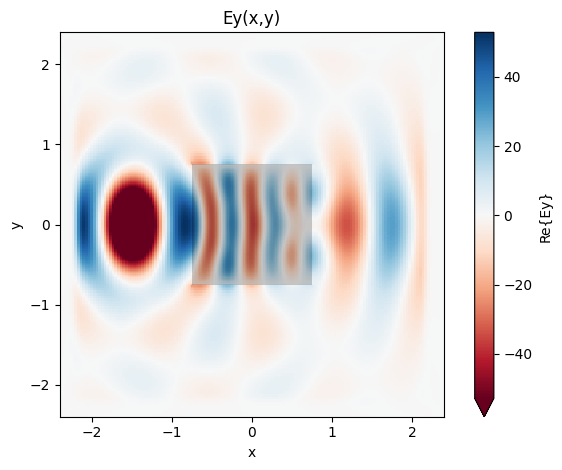

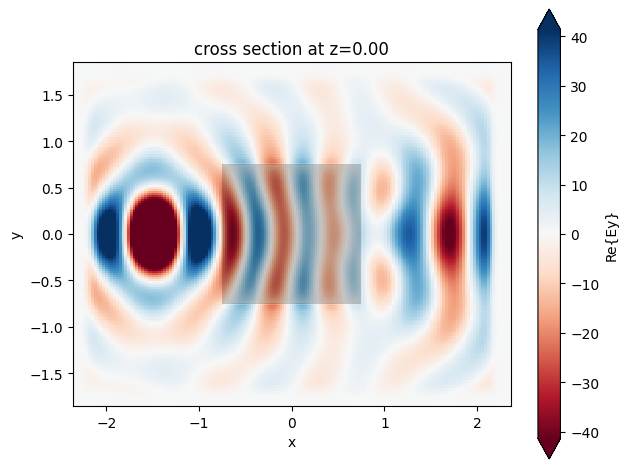

>>>>>>> remote


In [ ]:
# plot the field data stored in the monitor
ax = data.plot_field("fields", "Ey", z=0)